In [16]:
%load_ext autoreload
%autoreload 2

Perform range test 

In [17]:
from train import *
from networks import *
from utils import *
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 4]

In [18]:
data_args = dotdict()
data_args.batch_size = 64
data_args.val_fraction = 0.1
data_loader = Data(data_args)
print(f"{len(data_loader.train_set)= }")
print(f"{len(data_loader.val_set)  = }")
print(f"{len(data_loader.test_set) = }")
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

len(data_loader.train_set)= 54000
len(data_loader.val_set)  = 6000
len(data_loader.test_set) = 10000


In [21]:
# opt_type = optim.SGD
# opt_type = optim.Adam
opt_type = optim.Adadelta
model = Net().to(device)
results = range_test(1e-5, 2, device, data_loader, model, opt_type)
torch.cuda.empty_cache()

  0%|          | 0/844 [00:00<?, ?it/s]

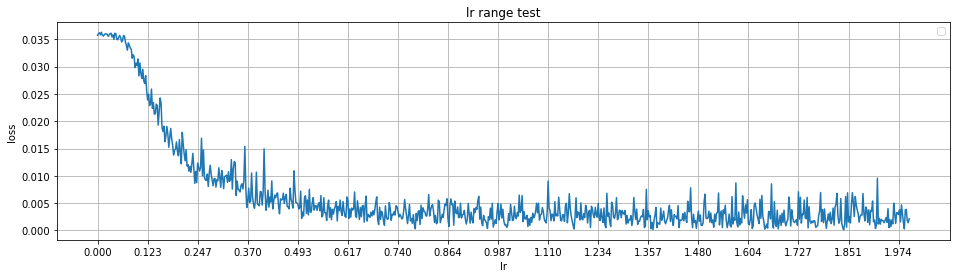

In [22]:
# display_results(results)

plot_dict_data('lr range test', 'lr', 'loss', [], [results.trn_loss])
_ = plt.xticks(list(results.trn_loss.keys())[::len(results.trn_loss)//16])